In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from football_sim import *
plt.rcParams['figure.figsize']=[16,9]

In [2]:
urls = {'EN': 'http://www.football-data.co.uk/mmz4281/1718/E0.csv',
                          'ES': 'http://www.football-data.co.uk/mmz4281/1718/SP1.csv',
                          'IT': 'http://www.football-data.co.uk/mmz4281/1718/I1.csv',
                          'FR': 'http://www.football-data.co.uk/mmz4281/1718/F1.csv',
                          'DE': 'http://www.football-data.co.uk/mmz4281/1718/D1.csv',
                          'NL': 'http://www.football-data.co.uk/mmz4281/1718/N1.csv'
                          }
urls = {'EN': 'http://www.football-data.co.uk/mmz4281/1718/E0.csv',
                          'ES': 'http://www.football-data.co.uk/mmz4281/1718/SP1.csv'
                          }


In [3]:
all_data=get_data(urls)
all_data['EN'].tail(5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG
255,2018-03-02,Man United,Huddersfield,2,0
256,2018-03-02,West Brom,Southampton,2,3
257,2018-04-02,Crystal Palace,Newcastle,1,1
258,2018-04-02,Liverpool,Tottenham,2,2
259,2018-05-02,Watford,Chelsea,4,1


In [4]:
all_data['EN']=add_match(all_data['EN'],'Man City',5,'Leicester',1)
all_data['EN']=add_match(all_data['EN'],'Everton',3,'Crystal Palace',1)
all_data['EN']=add_match(all_data['EN'],'Stoke',1,'Brighton',1)
all_data['EN']=add_match(all_data['EN'],'Swansea',1,'Burnley',0)
all_data['EN']=add_match(all_data['EN'],'West Ham',2,'Watford',0)
all_data['EN']=add_match(all_data['EN'],'Tottenham',1,'Arsenal',0)
all_data['EN'].tail(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG
256,2018-03-02,West Brom,Southampton,2,3
257,2018-04-02,Crystal Palace,Newcastle,1,1
258,2018-04-02,Liverpool,Tottenham,2,2
259,2018-05-02,Watford,Chelsea,4,1
260,2018-02-11,Man City,Leicester,5,1
261,2018-02-11,Everton,Crystal Palace,3,1
262,2018-02-11,Stoke,Brighton,1,1
263,2018-02-11,Swansea,Burnley,1,0
264,2018-02-11,West Ham,Watford,2,0
265,2018-02-11,Tottenham,Arsenal,1,0


In [5]:
teams = create_teams(all_data)

In [6]:
teams=calibrate(teams,all_data)

In [7]:
EnglishTeams={x:teams[x] for x in teams if teams[x].country=='EN'}
PremierLeague=Season(EnglishTeams)
PremierLeague.process_current_results(all_data['EN'])
PremierLeague.simulate_season(n_scenarios=100000)

In [8]:
PremierLeague.season_report()

simulation not yet processed, processing


,Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Man City,98.9,93.0,105.0,1.0,1.0,99.98,100.00,2.36,0.19,0.00
Man United,79.5,73.0,86.0,4.0,2.0,0.02,95.60,1.27,0.14,0.00
Liverpool,78.1,71.0,84.0,5.0,2.0,0.00,93.16,1.69,0.28,0.00
Tottenham,75.1,69.0,81.0,5.0,2.0,0.00,79.27,1.34,0.18,0.00
Chelsea,71.3,64.0,78.0,6.0,3.0,0.00,30.08,1.09,0.24,0.00
Arsenal,64.6,58.0,71.0,6.0,5.0,0.00,1.89,1.27,0.56,0.00
Burnley,52.6,46.0,59.0,10.0,7.0,0.00,0.00,0.32,0.18,0.00
Leicester,52.6,46.0,60.0,10.0,7.0,0.00,0.00,0.87,0.60,0.00
Everton,46.6,40.0,53.0,14.0,8.0,0.00,0.00,0.54,0.91,0.21
Bournemouth,45.5,39.0,53.0,15.0,8.0,0.00,0.00,0.62,0.73,0.50


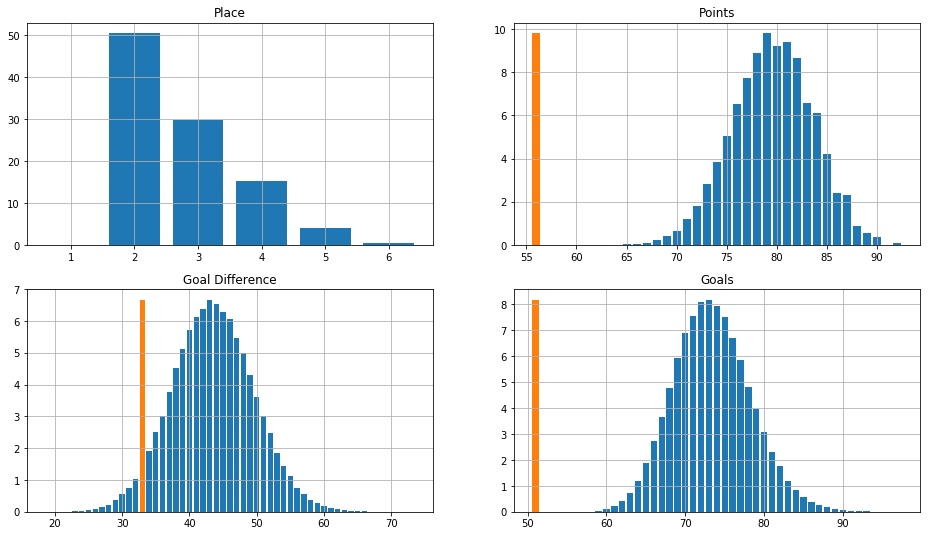

In [9]:
PremierLeague.team_report('Man United')

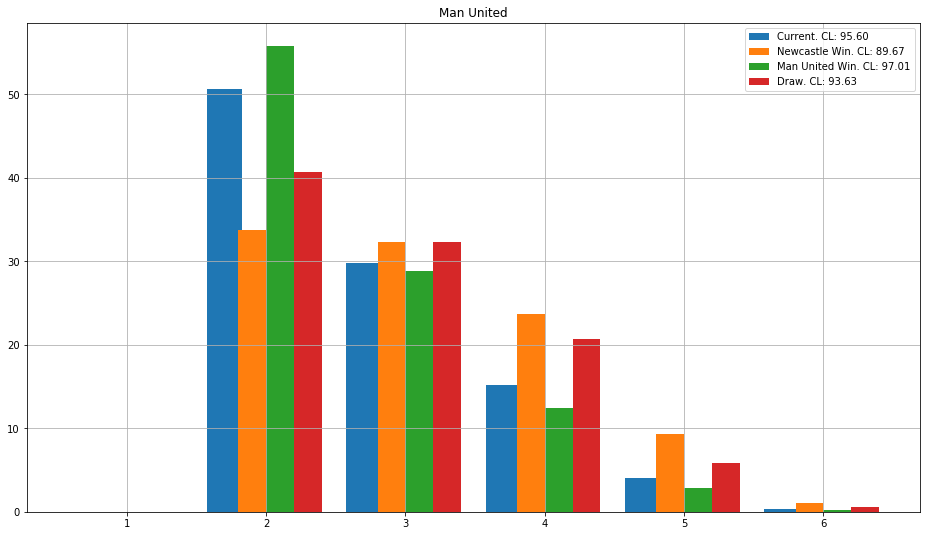

In [11]:
PremierLeague.what_if('Newcastle v Man United',ref_team='Man United')

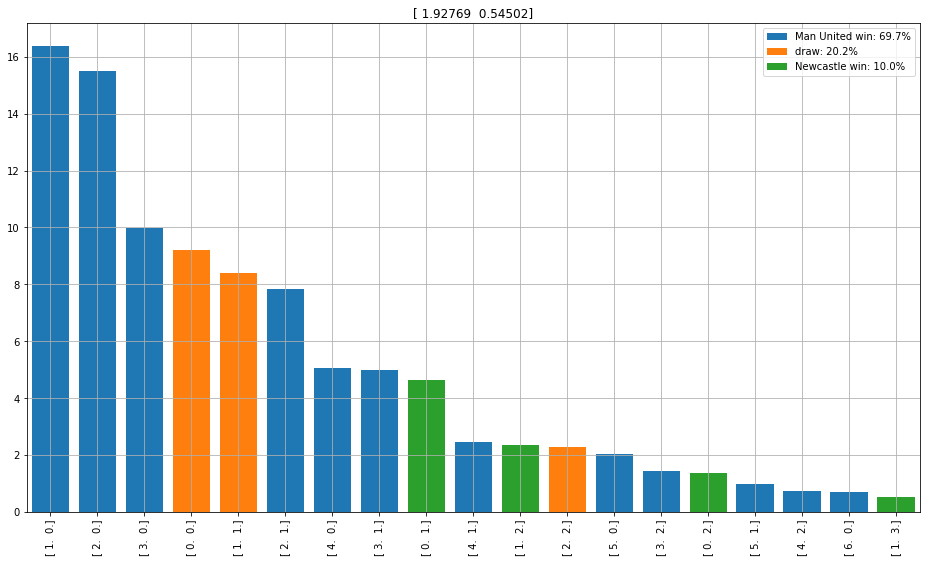

In [12]:
teams['Man United']+teams['Newcastle']

In [14]:
TeamSet={x:teams[x] for x in teams if teams[x].means()[0]>=1 and teams[x].country=='EN'}
#GoodTeams={x:teams[x] for x in teams if teams[x].means()[0]>=1.2}

In [15]:
CustomLeague=Season(TeamSet,nr_cl=2,nr_degr=1)
CustomLeague.process_current_results(all_data['EN'])
CustomLeague.process_current_results(all_data['ES'])
CustomLeague.process_current_results(all_data['DE'])
CustomLeague.process_current_results(all_data['NL'])
CustomLeague.process_current_results(all_data['FR'])
CustomLeague.process_current_results(all_data['IT'])
CustomLeague.simulate_season(n_scenarios=100000)

KeyError: 'DE'

In [ ]:
CustomLeague.team_report('Man United')

In [ ]:
CustomLeague.team_report('Man City')

In [ ]:
CustomLeague.season_report()

In [ ]:
SpanishTeams={x:teams[x] for x in teams if teams[x].country=='ES'}
LaLiga=Season(SpanishTeams)
LaLiga.process_current_results(all_data['ES'])
LaLiga.simulate_season(n_scenarios=100000)

In [ ]:
LaLiga.season_report()

In [ ]:
LaLiga.team_report('Real Madrid')

In [ ]:
LaLiga.team_report('Barcelona')